In [38]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.1)
sns.set_palette("Set1")

In [15]:
df = pd.read_csv('results/all_features_all_tt_seq_final.csv')
df = df.rename(columns={'Avoidance(Min_dg_int)':'Avoidance'})
df.head()

,Accession,Sequence,Class,Label,analyze,CAI,tAI,G+C (%),STR(-30:30),Avoidance_unparsed,Accessibility,Avd_parsed_dg_int,Avoidance
0,BbCD00385183,ATGCTCACTATCGATACGGCGTCCCGCACTTTTCACTGCAAGACCT...,2.0,1.0,<features.AnalyzeSequenceFeatures object at 0x...,0.287629,0.231803,63.834423,-4.4,>input_mrna:break\n>ECD_RS01040_tRNA-Ile_GAT\n...,10.250980,[[ -6.8 -25.55 -13.9 -14.5 -18.81 -15.82 -2...,-27.46
1,BbCD00385184,ATGACCCTGAAAACCATGACGCTGGCTTTTGCCGTAACCGGCCTTG...,0.0,0.0,<features.AnalyzeSequenceFeatures object at 0x...,0.331518,0.232533,58.943089,-3.8,>input_mrna:break\n>ECD_RS01040_tRNA-Ile_GAT\n...,9.809347,[[ -8.1 -6.8 -7.76 -6.3 -26.64 -9.8 -...,-26.64
2,BcCD00540749,ATGAACGGGAAGCAAGTAAACAATGTGGAAGGCGTTGTCACAGCGC...,2.0,1.0,<features.AnalyzeSequenceFeatures object at 0x...,0.264601,0.221840,39.866667,-3.6,>input_mrna:break\n>ECD_RS01040_tRNA-Ile_GAT\n...,5.627092,[[-11.31 -4.5 -7. -5.6 -8.8 -5.9 -...,-18.62
3,BcCD00583995,ATGGGAGATAAATATATTACTGTTCAAAAAGTCGGTAAGAAAATAT...,2.0,1.0,<features.AnalyzeSequenceFeatures object at 0x...,0.284978,0.194533,35.103245,-3.9,>input_mrna:break\n>ECD_RS01040_tRNA-Ile_GAT\n...,8.872705,[[ -3.2 -6.6 -6. -4.2 -2.7 -2.7 -...,-22.77
4,BsCD00423013,ATGAGCTTGCAATTTAGCGTACTTGCGAGCGGGAGTACGGGAAATG...,1.0,1.0,<features.AnalyzeSequenceFeatures object at 0x...,0.250264,0.192802,48.255114,-10.5,>input_mrna:break\n>ECD_RS01040_tRNA-Ile_GAT\n...,11.673680,[[ -6.2 -1.8 -6.9 -4.9 -6.2 -6.2 -...,-12.60


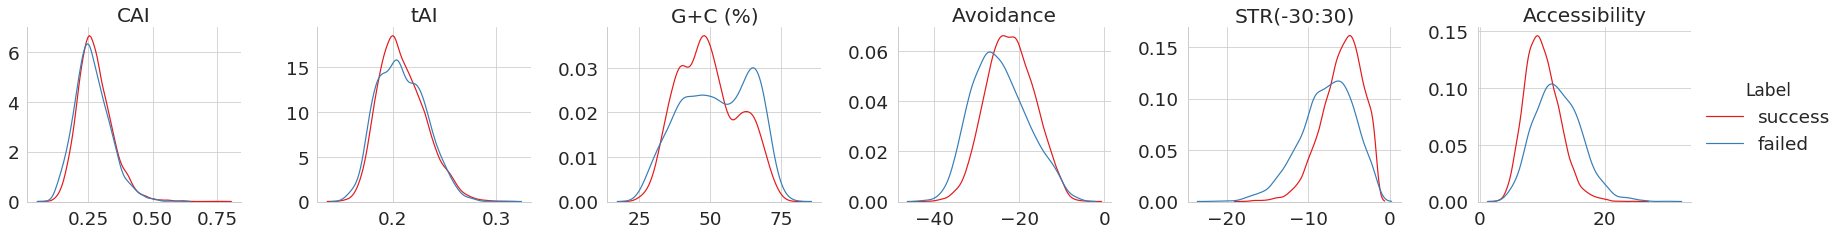

In [41]:
plot_df = df[['Label', 'CAI', 'tAI', 'G+C (%)', 'Avoidance', 'STR(-30:30)', 'Accessibility']].copy()

plot_df['Label'] = plot_df['Label'].replace(1,'success')
plot_df['Label'] = plot_df['Label'].replace(0,'failed')
plot_df_final = plot_df.melt(['Label'], var_name='cols',  value_name='vals')

fg = sns.FacetGrid(plot_df_final, col='cols', hue='Label', 
                       sharex=False, sharey=False, height=4, palette="Set1")
sns_plot = fg.map(sns.kdeplot, 'vals', shade=False, label='Data')\
         .add_legend()\
         .set_titles("{col_name}")\
         .set_axis_labels('')

sns.despine()
sns_plot.savefig('figs/Distribution_of_features.pdf')